# ДЗ 1
### Екатерина Кострыкина

In [ ]:
!wget https://www.dropbox.com/s/802ohw5hy1lgk25/Shoes_Data.csv?dl=0 -O Shoes_Data.csv

--2021-09-26 11:26:15--  https://www.dropbox.com/s/802ohw5hy1lgk25/Shoes_Data.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/802ohw5hy1lgk25/Shoes_Data.csv [following]
--2021-09-26 11:26:15--  https://www.dropbox.com/s/raw/802ohw5hy1lgk25/Shoes_Data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2bf46fffd7459ba6812982cdae.dl.dropboxusercontent.com/cd/0/inline/BW7nl5HSWbuoHkfScW6YjrwjJ-uBSS__6WRLA_G3E3pR6U6-gDMNiSPylFUDxd_0G6dDdsIBnRhzmdbbIyRvYaUnGN62VUpenlYzkntSXTplLDpCJFKf9y-Yxg_r3Do3rjllKB-ih8TG5jp7WQG_Z_Uk/file# [following]
--2021-09-26 11:26:16--  https://uc2bf46fffd7459ba6812982cdae.dl.dropboxusercontent.com/cd/0/inline/BW7nl5HSWbuoHkfScW6YjrwjJ-uBSS__6WRLA_G3E3pR6U6-gDMNiSPylFUDxd_0G6dDdsIBnRhzmdb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, make_scorer, mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

# Задание 1

In [ ]:
df = pd.read_csv('Shoes_Data.csv')

In [ ]:
df

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
...,...,...,...,...,...,...,...,...
1225,Nike Men's React Vision Running Shoes,₹7256.00,4.4 out of 5 stars,200 ratings,The Nike react vision is a STORY of surreal co...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women
1226,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,₹5822.00,4.3 out of 5 stars,25 ratings,The B.O.G limitless is Puma's key style for th...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women
1227,new balance Women's FuelCell Echolucent Runnin...,₹5362.00,4.5 out of 5 stars,817 ratings,Lead the pack in New Balance’s Echolucent snea...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women
1228,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,₹7480.00,4.5 out of 5 stars,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,Verified Purchase|| Verified Purchase|| Verifi...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Women


проанализируем данные, посмотрим есть ли пропуски

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1230 non-null   object
 1   price                1230 non-null   object
 2   rating               1230 non-null   object
 3   total_reviews        1230 non-null   object
 4   product_description  1230 non-null   object
 5   reviews              1230 non-null   object
 6   reviews_rating       1230 non-null   object
 7   Shoe Type            1230 non-null   object
dtypes: object(8)
memory usage: 77.0+ KB


Приведем столбец price к числовому виду (уберем значек валюты)

In [ ]:
df['price'] = [float(i[1:]) for i in df['price']]

Может ли цена товара зависеть от длины описания? Например более подробно расписанные товары могут стоить дороже и наоборот?

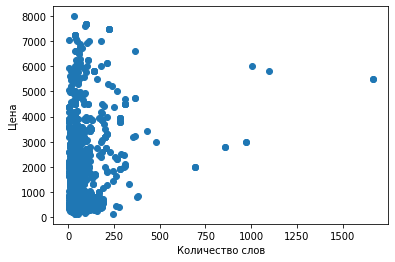

In [ ]:
plt.scatter(df.product_description.apply(lambda x: len(x.split(' '))), df.price)
plt.ylabel('Цена')
plt.xlabel('Количество слов');

По графику видно, что почти все описания +- 0-250 слов, зависимости не видно

Построим графики боксплот и столбчатую диаграмму, чтобы посмотреть распределение цен

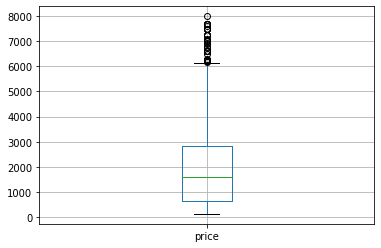

In [ ]:
df.boxplot(column='price');

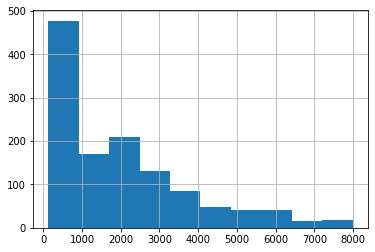

In [ ]:
df.price.hist();

По графикам видно, что большинство товаров стоит в районе 0-3000

In [ ]:
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stops = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Приведем текст к нижнему регистру

Удалим ссылки, все, что не буквы, цифры, скобочки(например ) может означать что-то хорошее) и восклицательные знаки

Уберем стоп-слова, так как это часто встречающееся слова во всех отзывах, плохих и хороших

In [ ]:
def clean(text):
    text = text.lower()
    text = re.sub('(https?://[^\s]+)', '', text)
    text = re.sub('[^a-zA-Zа-яА-Я0-9()!]+', ' ', text)
    text = re.sub(' +', ' ', text)
    text = ' '.join([word for word in word_tokenize(text) if word not in stops])
    text = text.strip()
    return text

In [ ]:
df['product_description'] = [clean(t) for t in tqdm(df['product_description'])]

  0%|          | 0/1230 [00:00<?, ?it/s]

In [ ]:
df

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,279.0,2.9 out of 5 stars,2389 ratings,elevate style classy pair running shoe house c...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,479.0,3.9 out of 5 stars,11520 ratings,product excellent pick ensures easy maintenance,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,430.0,3.3 out of 5 stars,1251 ratings,flaunt stylish unique red casual shoes per lat...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,499.0,4.2 out of 5 stars,3 ratings,robbie jones shoes designed keeping mind durab...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,499.0,4.2 out of 5 stars,20110 ratings,sparx spectacular range footwear house relaxo ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
...,...,...,...,...,...,...,...,...
1225,Nike Men's React Vision Running Shoes,7256.0,4.4 out of 5 stars,200 ratings,nike react vision story surreal comfort layere...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women
1226,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,5822.0,4.3 out of 5 stars,25 ratings,b g limitless puma key style new season inspir...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women
1227,new balance Women's FuelCell Echolucent Runnin...,5362.0,4.5 out of 5 stars,817 ratings,lead pack new balance echolucent sneaker sneak...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women
1228,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,7480.0,4.5 out of 5 stars,67 ratings,nike 5k nike women running shoe feels even loo...,Verified Purchase|| Verified Purchase|| Verifi...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Women


Разобьем данные на трейн и тест, далее будем обучать векторайзеры на трейне и векторизовать тест

In [ ]:
XX_train, XX_test, y_train, y_test = train_test_split(df['product_description'], df['price'])

In [ ]:
vectorizer = TfidfVectorizer()
X_train =  vectorizer.fit_transform(XX_train)
X_test = vectorizer.transform(XX_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train.shape

(922, 3507)

Напишем функцию для более удобного вывода качества

In [ ]:
def get_score(ytest, ypred):
    print('MAE:', mean_absolute_error(ytest, ypred), '\n'
    'MSE:', mean_squared_error(ytest, ypred), '\n'
    'RMSE:', mean_squared_error(ytest, ypred, squared=False)
    )

RandomForestRegressor

In [ ]:
model1 = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [100, 300, 500],
    }
clf1 = GridSearchCV(model1, param_grid, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=3)
clf1.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
get_score(y_test, clf1.predict(X_test))

MAE: 571.7992705007979 
MSE: 887099.2649296116 
RMSE: 941.8594719646936


LinearRegression

In [ ]:
model2 = LinearRegression()
param_grid2 = {
    "fit_intercept": [True, False],
    "normalize": ['True', 'False'], 
    }
clf2 = GridSearchCV(model2, param_grid2, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=3)
clf2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': ['True', 'False']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=0)

In [ ]:
get_score(y_test, clf2.predict(X_test))

MAE: 703.8532787206765 
MSE: 1433337.1391866428 
RMSE: 1197.220589192586


Линейная регрессия справилась хуже, чем случайный лес

SGDRegressor

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
model3 = SGDRegressor()
param_grid3 = {
    "max_iter": [500, 1000, 1500, 2500],
    "alpha": np.linspace(0, 1, 10), 
    }
clf3 = GridSearchCV(model3, param_grid3, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=3)
clf3.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'max_iter': [500, 1000, 1500, 2500]},
      

In [ ]:
get_score(y_test, clf3.predict(X_test))

MAE: 736.9720251332765 
MSE: 1707968.0526059829 
RMSE: 1306.8925176180262


(чем больше количество итераций, тем лучше качество)

Слусайный лес остается лидером

### Bag Of Words

In [ ]:
vectorizer = CountVectorizer()
X_train =  vectorizer.fit_transform(XX_train)
X_test = vectorizer.transform(XX_test)

In [ ]:
model4 = RandomForestRegressor()
param_grid4 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [100, 300, 500],
    }
clf4 = GridSearchCV(model1, param_grid, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=3)
clf4.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
get_score(y_test, clf4.predict(X_test))

MAE: 536.3062725213833 
MSE: 829218.6891423166 
RMSE: 910.6144569148441


Векторизация BOW способствует лучшему качеству при использовании Random Forest

LinearRegression

In [ ]:
model5 = LinearRegression()
param_grid5 = {
    "fit_intercept": [True, False],
    "normalize": ['True', 'False'], 
    }
clf5 = GridSearchCV(model5, param_grid5, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=3)
clf5.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': ['True', 'False']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=0)

In [ ]:
get_score(y_test, clf5.predict(X_test))

MAE: 1015.7294725205129 
MSE: 3454072.203637611 
RMSE: 1858.5134391867095


SGDRegressor

In [ ]:
model6 = SGDRegressor()
param_grid6 = {
    "max_iter": [500, 1000, 1500, 2500],
    "alpha": np.linspace(0, 1, 10), 
    }
clf6 = GridSearchCV(model6, param_grid6, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=3)
clf6.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'max_iter': [500, 1000, 1500, 2500]},
      

In [ ]:
get_score(y_test, clf6.predict(X_test))

MAE: 738.5553456718786 
MSE: 1701466.8323918155 
RMSE: 1304.4028642991457


Вывод: лучшее качество было достигнуто при использовании Random Forest (что было ожидаемо, так как это более сильная модель, чем простая линейная регрессия) и векторизации с помощью BOW. Последнее мне показалось странным, я думала, что TF-IDF лучше себя покажет. 

# Задание 2

In [ ]:
df = pd.read_csv('Shoes_Data.csv')
df

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
...,...,...,...,...,...,...,...,...
1225,Nike Men's React Vision Running Shoes,₹7256.00,4.4 out of 5 stars,200 ratings,The Nike react vision is a STORY of surreal co...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women
1226,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,₹5822.00,4.3 out of 5 stars,25 ratings,The B.O.G limitless is Puma's key style for th...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women
1227,new balance Women's FuelCell Echolucent Runnin...,₹5362.00,4.5 out of 5 stars,817 ratings,Lead the pack in New Balance’s Echolucent snea...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women
1228,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,₹7480.00,4.5 out of 5 stars,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,Verified Purchase|| Verified Purchase|| Verifi...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Women


проанализируем данные, посмотрим есть ли пропуски


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1230 non-null   object
 1   price                1230 non-null   object
 2   rating               1230 non-null   object
 3   total_reviews        1230 non-null   object
 4   product_description  1230 non-null   object
 5   reviews              1230 non-null   object
 6   reviews_rating       1230 non-null   object
 7   Shoe Type            1230 non-null   object
dtypes: object(8)
memory usage: 77.0+ KB


Так как в одной строчке находится сразу несколько отзывов и оценок на один товар, разделим эти строки по знаку '||' и сделаем новый датафрейм

In [ ]:
titles, reviews, stars = [], [], []
for i in range(df.shape[0]):
  reviews.extend(df['reviews'][i].split('||'))
  marks = df['reviews_rating'][i].split('|| ')
  stars.extend([int(j[0]) for j in marks])
  titles.extend([df['title'][i] for _ in range(len(marks))])

In [ ]:
df = pd.DataFrame()
df['title'] = titles
df['review'] = reviews
df['star'] = stars

In [ ]:
df

,title,review,star
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,Not happy with product,1
1,CLYMB Outdoor Sports Running Shoes for Mens Boy,It's not as expected.,1
2,CLYMB Outdoor Sports Running Shoes for Mens Boy,AVERAGE PRODUCT,3
3,CLYMB Outdoor Sports Running Shoes for Mens Boy,Pic more beautiful,3
4,CLYMB Outdoor Sports Running Shoes for Mens Boy,Got damage product. But quality is average fo...,3
...,...,...,...
9953,ASICS Women Gt-2000 7 Lite-Show Running Shoes,Go for it!,5
9954,ASICS Women Gt-2000 7 Lite-Show Running Shoes,Excellent product,5
9955,ASICS Women Gt-2000 7 Lite-Show Running Shoes,Nice shoe,5
9956,ASICS Women Gt-2000 7 Lite-Show Running Shoes,Nice,5


Может ли оценка товара зависеть от длины отзыва? Например более подробно расписанные отзывы могут иметь плохую оценку и наоборот?

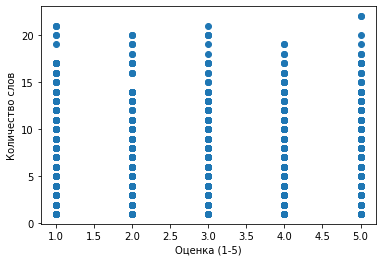

In [ ]:
plt.scatter(df.star, df.review.apply(lambda x: len(x.split(' '))))
plt.xlabel('Оценка (1-5)')
plt.ylabel('Количество слов');

Особой зависимости нет

Посмотрим на распределение оценок

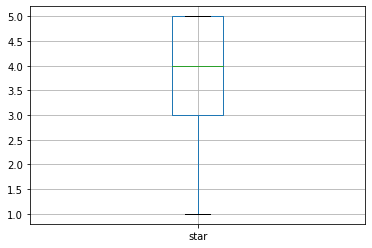

In [ ]:
df.boxplot(column='star');

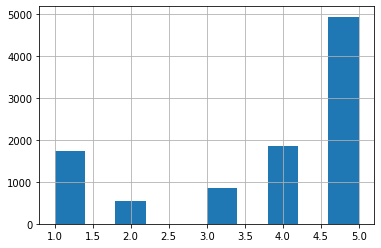

In [ ]:
df.star.hist();

In [ ]:
df['star'].value_counts()

5    4944
4    1853
1    1749
3     863
2     549
Name: star, dtype: int64

Больше всего оценок 5, далее идут 1 и 4, оставшееся на 2 и 3

In [ ]:
df['review'] = [clean(t) for t in tqdm(df['review'])]

  0%|          | 0/9958 [00:00<?, ?it/s]

In [ ]:
df

,title,review,star
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,happy product,1
1,CLYMB Outdoor Sports Running Shoes for Mens Boy,expected,1
2,CLYMB Outdoor Sports Running Shoes for Mens Boy,average product,3
3,CLYMB Outdoor Sports Running Shoes for Mens Boy,pic beautiful,3
4,CLYMB Outdoor Sports Running Shoes for Mens Boy,got damage product quality average 300,3
...,...,...,...
9953,ASICS Women Gt-2000 7 Lite-Show Running Shoes,go !,5
9954,ASICS Women Gt-2000 7 Lite-Show Running Shoes,excellent product,5
9955,ASICS Women Gt-2000 7 Lite-Show Running Shoes,nice shoe,5
9956,ASICS Women Gt-2000 7 Lite-Show Running Shoes,nice,5


Разобьем данные на трейн и тест, далее будем обучать векторайзеры на трейне и векторизовать тест

In [ ]:
XX_train, XX_test, y_train, y_test = train_test_split(df['review'], df['star'])

In [ ]:
vectorizer = TfidfVectorizer()
X_train =  vectorizer.fit_transform(XX_train)
X_test = vectorizer.transform(XX_test)

RandomForestClassifier

In [ ]:
model1 = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [100, 300, 500],
    }
clf1 = GridSearchCV(model1, param_grid, cv=3)
clf1.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
import seaborn as sns

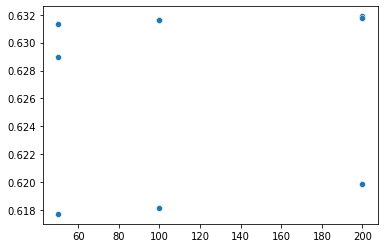

In [263]:
cs = [i for i in clf1.cv_results_['param_n_estimators']]
quals = [i for i in clf1.cv_results_['mean_test_score']]
sns.scatterplot(cs, quals)

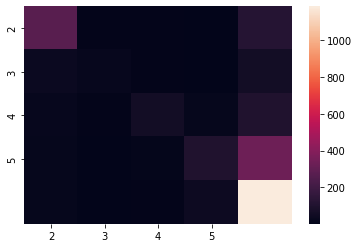

In [ ]:
sns.heatmap(confusion_matrix(y_test, clf1.predict(X_test)), xticklabels=clf1.classes_[1:], yticklabels=clf1.classes_[1:]);

In [ ]:
print(classification_report(y_test, clf1.predict(X_test)))

              precision    recall  f1-score   support

           1       0.73      0.65      0.69       415
           2       0.45      0.18      0.26       134
           3       0.61      0.28      0.39       218
           4       0.59      0.22      0.32       468
           5       0.66      0.94      0.78      1255

    accuracy                           0.66      2490
   macro avg       0.61      0.46      0.49      2490
weighted avg       0.64      0.66      0.61      2490



LogisticRegression

In [ ]:
model2 = LogisticRegression(solver='liblinear')
param_grid2 = {"C":np.logspace(-3,3,7), 
               "penalty":["l1","l2"]}
clf2 = GridSearchCV(model2, param_grid2, cv=3)
clf2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [255]:
clf2.best_params_

{'C': 10.0, 'penalty': 'l2'}

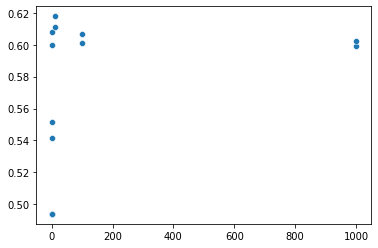

In [266]:
cs = [i for i in clf2.cv_results_['param_C']]
quals = [i for i in clf2.cv_results_['mean_test_score']]
sns.scatterplot(cs, quals)

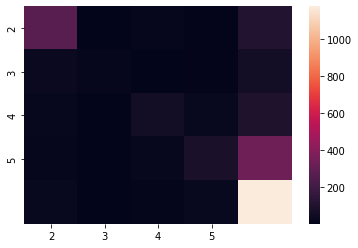

In [ ]:
sns.heatmap(confusion_matrix(y_test, clf2.predict(X_test)), xticklabels=clf2.classes_[1:], yticklabels=clf2.classes_[1:]);

In [ ]:
print(classification_report(y_test, clf2.predict(X_test)))

              precision    recall  f1-score   support

           1       0.71      0.65      0.68       415
           2       0.48      0.15      0.23       134
           3       0.47      0.28      0.35       218
           4       0.53      0.18      0.27       468
           5       0.66      0.94      0.78      1255

    accuracy                           0.65      2490
   macro avg       0.57      0.44      0.46      2490
weighted avg       0.62      0.65      0.60      2490



KNeighborsClassifier

In [251]:
model3 = KNeighborsClassifier()
param_grid3 = {"n_neighbors": [i for i in range(5, 500, 10)],
               "metric": ['euclidean', 'manhattan']
               }
clf3 = GridSearchCV(model3, param_grid3, cv=3)
clf3.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95,
                                         105, 115, 125, 135, 145, 155, 165, 175,
                                         185, 195, 205, 215, 225, 235, 245, 255,
                                         265, 275, 285, 295, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

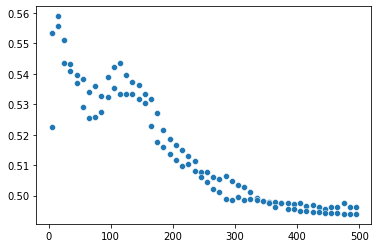

In [252]:
cs = [i for i in clf3.cv_results_['param_n_neighbors']]
quals = [i for i in clf3.cv_results_['mean_test_score']]
sns.scatterplot(cs, quals)

C увеличением количества соседей качество падает, так что больше брать не нужно

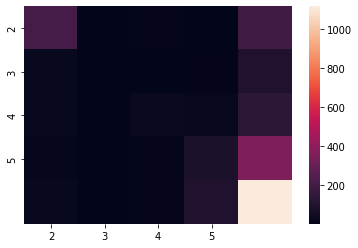

In [267]:
sns.heatmap(confusion_matrix(y_test, clf3.predict(X_test)), xticklabels=clf3.classes_[1:], yticklabels=clf3.classes_[1:]);

In [268]:
print(classification_report(y_test, clf3.predict(X_test)))

              precision    recall  f1-score   support

           1       0.69      0.49      0.57       415
           2       0.25      0.02      0.04       134
           3       0.42      0.15      0.22       218
           4       0.39      0.17      0.24       468
           5       0.59      0.89      0.71      1255

    accuracy                           0.58      2490
   macro avg       0.47      0.34      0.36      2490
weighted avg       0.53      0.58      0.52      2490



### BOW

In [269]:
vectorizer = CountVectorizer()
X_train =  vectorizer.fit_transform(XX_train)
X_test = vectorizer.transform(XX_test)

RandomForestClassifier

In [270]:
model4 = RandomForestClassifier()
param_grid4 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [100, 300, 500],
    }
clf4 = GridSearchCV(model4, param_grid4, cv=3)
clf4.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

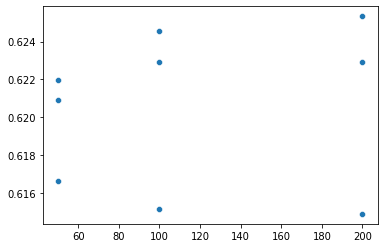

In [271]:
cs = [i for i in clf4.cv_results_['param_n_estimators']]
quals = [i for i in clf4.cv_results_['mean_test_score']]
sns.scatterplot(cs, quals)

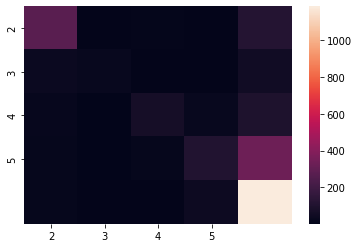

In [272]:
sns.heatmap(confusion_matrix(y_test, clf4.predict(X_test)), xticklabels=clf4.classes_[1:], yticklabels=clf4.classes_[1:]);

In [273]:
print(classification_report(y_test, clf4.predict(X_test)))

              precision    recall  f1-score   support

           1       0.75      0.66      0.70       415
           2       0.56      0.20      0.30       134
           3       0.60      0.32      0.42       218
           4       0.57      0.22      0.32       468
           5       0.67      0.94      0.78      1255

    accuracy                           0.67      2490
   macro avg       0.63      0.47      0.50      2490
weighted avg       0.65      0.67      0.62      2490



LogisticRegression

In [274]:
model5 = LogisticRegression(solver='liblinear')
param_grid5 = {"C":np.logspace(-3,3,7), 
               "penalty":["l1","l2"]}
clf5 = GridSearchCV(model5, param_grid5, cv=3)
clf5.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

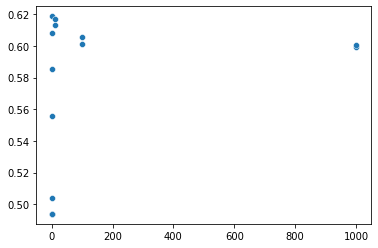

In [275]:
cs = [i for i in clf5.cv_results_['param_C']]
quals = [i for i in clf5.cv_results_['mean_test_score']]
sns.scatterplot(cs, quals)

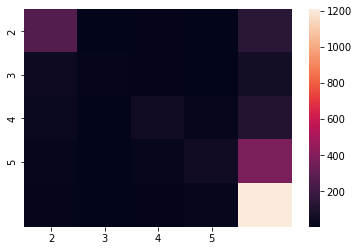

In [276]:
sns.heatmap(confusion_matrix(y_test, clf5.predict(X_test)), xticklabels=clf5.classes_[1:], yticklabels=clf5.classes_[1:]);

In [277]:
print(classification_report(y_test, clf5.predict(X_test)))

              precision    recall  f1-score   support

           1       0.71      0.63      0.67       415
           2       0.62      0.12      0.20       134
           3       0.53      0.23      0.32       218
           4       0.52      0.12      0.19       468
           5       0.64      0.96      0.77      1255

    accuracy                           0.64      2490
   macro avg       0.60      0.41      0.43      2490
weighted avg       0.62      0.64      0.57      2490



KNeighborsClassifier

In [278]:
model6 = KNeighborsClassifier()
param_grid6 = {"n_neighbors": [i for i in range(5, 500, 10)],
               "metric": ['euclidean', 'manhattan']
               }
clf6 = GridSearchCV(model6, param_grid6, cv=3)
clf6.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95,
                                         105, 115, 125, 135, 145, 155, 165, 175,
                                         185, 195, 205, 215, 225, 235, 245, 255,
                                         265, 275, 285, 295, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

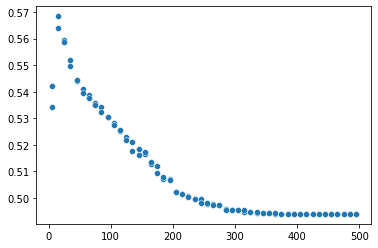

In [279]:
cs = [i for i in clf6.cv_results_['param_n_neighbors']]
quals = [i for i in clf6.cv_results_['mean_test_score']]
sns.scatterplot(cs, quals)

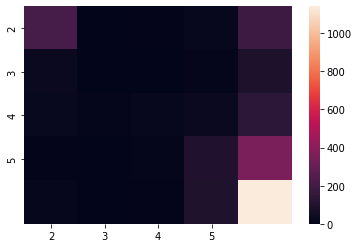

In [280]:
sns.heatmap(confusion_matrix(y_test, clf6.predict(X_test)), xticklabels=clf6.classes_[1:], yticklabels=clf6.classes_[1:]);

In [281]:
print(classification_report(y_test, clf5.predict(X_test)))

              precision    recall  f1-score   support

           1       0.71      0.63      0.67       415
           2       0.62      0.12      0.20       134
           3       0.53      0.23      0.32       218
           4       0.52      0.12      0.19       468
           5       0.64      0.96      0.77      1255

    accuracy                           0.64      2490
   macro avg       0.60      0.41      0.43      2490
weighted avg       0.62      0.64      0.57      2490



Вывод: в этом задании опять лучший результат у Random Forest и BOW векторизации. 

По графикам и classification_report видно, что все три модели плохо справляются с выделением редких классов, как и предполагалось ранее - лучше всего модели выделяют 5 класс (оценка 5 самая частотная)

